In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
advertising_multi = pd.read_csv('data/advertising.csv')
advertising_multi.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
advertising_multi.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [4]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising_multi.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


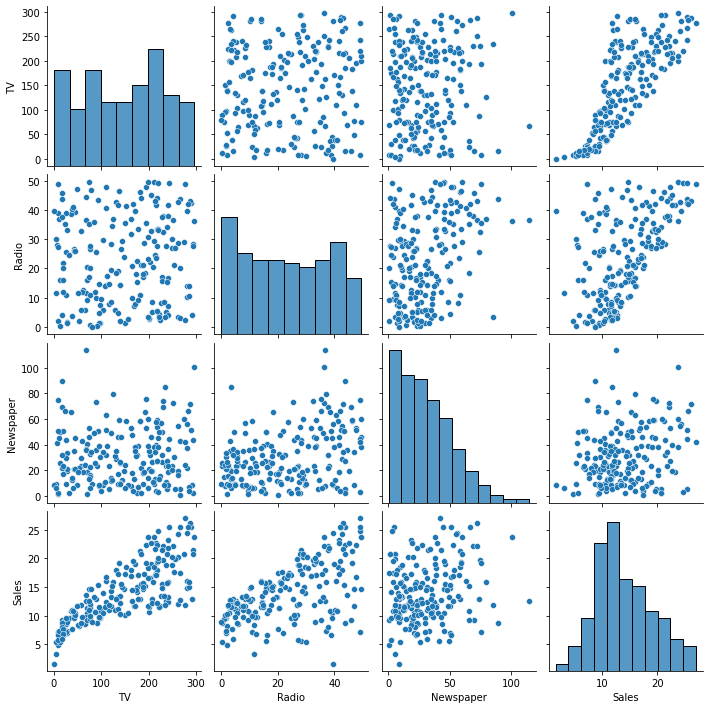

In [6]:
# visualizing data
sns.pairplot(advertising_multi)
plt.show()

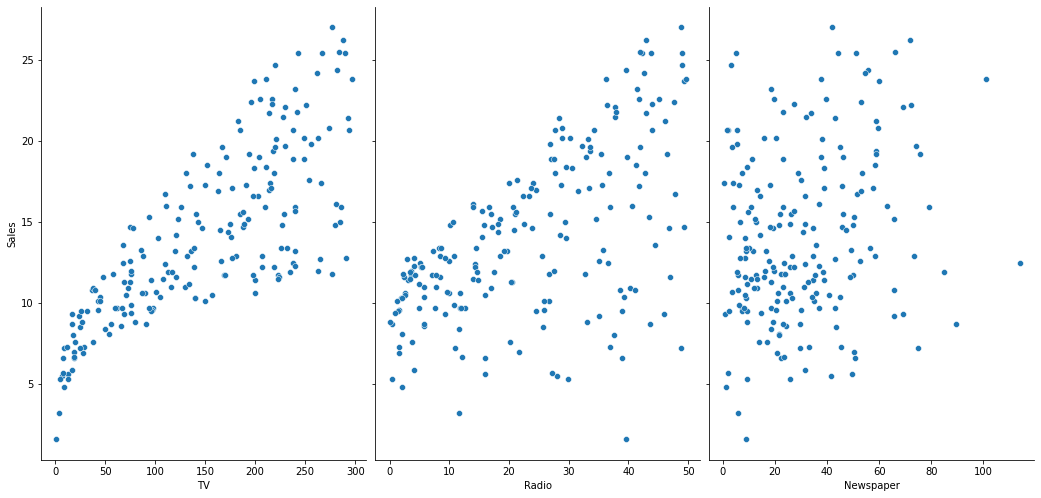

In [7]:
# visualize with respect to the Sales
sns.pairplot(advertising_multi,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=7,aspect=.7)
plt.show()

In [8]:
X = advertising_multi[['TV','Radio','Newspaper']]
y = advertising_multi['Sales']


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=100)

In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()


In [11]:
lm.fit(X_train,y_train)

LinearRegression()

In [12]:
# model evaluation
print(lm.intercept_)

2.652789668879498


In [13]:
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


In [14]:
# predictions
y_pred = lm.predict(X_test)


In [15]:
# error Calculations
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)

In [16]:
print('Mean Squared Error:',mse)
print('R squared value:',r_squared)

Mean Squared Error: 1.8506819941636963
R squared value: 0.9058622107532246


In [17]:
# checking fot p value using statsModels
import statsmodels.api as sm
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm) # B0*x0 where x0=1

lm_1 = sm.OLS(y_train,X_train_sm).fit()

# params
lm_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [18]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           9.97e-66
Time:                        21:51:50   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

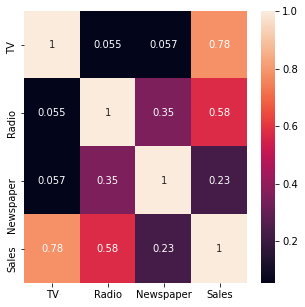

In [19]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising_multi.corr(),annot=True)
plt.show()

### implementing the results of the running code without the Correlation

In [21]:
# removing Newspaper from our dataset
X_train_new = X_train[['TV','Radio']]
X_test_new = X_test[['TV','Radio']]

In [22]:
lm.fit(X_train_new,y_train)

LinearRegression()

Text(0.5, 0, 'Sales')

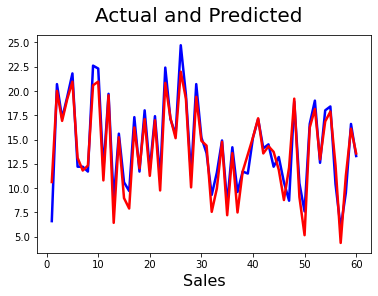

In [23]:
# actual vs predicted
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.xlabel('Sales',fontsize=16)

In [24]:
y_pred_new = lm.predict(X_test_new)


Text(0.5, 0, 'Sales')

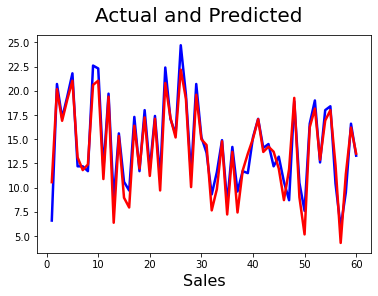

In [25]:
# actual vs predicted with new term
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred_new,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.xlabel('Sales',fontsize=16)

Text(0.5, 0, 'Sales')

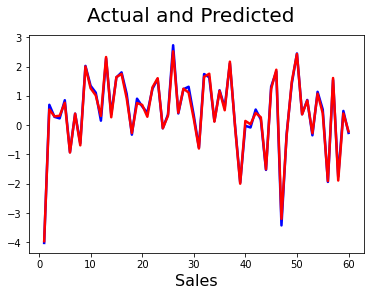

In [26]:
# actual vs predicted with new term
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_test-y_pred_new,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.xlabel('Sales',fontsize=16)

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred_new)
r_squared = r2_score(y_test,y_pred_new)


In [29]:
print(mse)
print(r_squared)

1.7847400520902805
0.909216449171822


### Now with statsModel to get the nice View

In [30]:
X_train_final = X_train_new

X_train_final = sm.add_constant(X_train_final)

lm_final = sm.OLS(y_train,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           4.46e-67
Time:                        23:08:42   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

### Equation due to multi_linear regression model
$0.455$$TV$ + $0.1925$$Radio$ + $2.7190$

### Model Refinement using RFE
The goal is select features by recursively considering smaller and smaller sets

In [ ]:
# todo do it later

### proof that the newspaper column is bad

In [46]:
x_news = advertising_multi['Newspaper']

y_news = advertising_multi['Sales']

# data split

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(x_news,y_news,train_size=.7,random_state=100)

X_train_n = np.array(X_train_n)[:,np.newaxis]
X_test_n = np.array(X_test_n)[:,np.newaxis]

lm.fit(X_train_n,y_train_n)

y_pred_n = lm.predict(X_test_n)

mse = mean_squared_error(y_test_n,y_pred_n)
r_squared = r2_score(y_test_n,y_pred_n)

print(mse)
print(r_squared)

# something is going wrong i think here

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64
22.783129716276214
-0.1588989736629216
